# Importación de Librerias

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Metodos Usados

## Limpiar datos de una columna
Elimina espacios en blanco en los valores de una columna.

In [3]:
def clear_column(column):
    new_column = []
    for value in column:
        new_column.append(value.replace(' ', ''))
    return new_column

## Limpia los datos recibidos
Limpia los datos de un DataFrame.

In [4]:
def clear_data(data):
    data.columns = clear_column(data.columns)
    data[['']] = clear_column(data[''])
    data = data.set_index('')
    cols = data.columns
    for col in cols:
        data[col] = data[col].astype(float)
    for i in range(len(data)):
        for j in range(i, len(cols)):
            data.iat[i, j] = np.nan
    return data

## Obtener Indices del menor valor
Encuentra el menor valor y devuelve un arreglo con sus indices respectivos.

In [5]:
def getMinIndexes(data):
    minimus = data.idxmin(skipna=True).dropna()
    for i, row in enumerate(minimus):
        minimus[i] = [data[minimus.index[i]][row], row, minimus.index[i]]
    return min(minimus)

## Funciones para operar con datos que pueden recivbir datos Nan
Dependiendo de lo que se necesite devuelven el menor, mayor y promedio entre dos datos.

In [6]:
def minna(a, b):
    if pd.notna(a):
        return min(a, b)
    return b

def maxna(a, b):
    if pd.notna(a):
        return max(a, b)
    return b

def meanna(a, b):
    if pd.notna(a):
        return (a + b) / 2.0
    return b

## Añadir Fila y Columna a un DataFrame
Añade una fila y una fila aplicando en su contenido el resultado de una funcion que se le mande.

In [7]:
def add_row_and_column_to_data(data, column1, column2, function, label):
    new_column = (data.apply(lambda row: function(row[column1], row[column2]), axis=1))
    new_row = (data.apply(lambda row: function(row[column1], row[column2]), axis=0))
    new_row.name = label
    data = data.append(new_row, ignore_index=False)
    del (data[column1])
    del (data[column2])
    data[label] = new_column
    return  data.drop([column1, column2])

## Algoritmo para Clutering Jerarquico Aglomerativo
Recibe un conjunto de datos y una función con los cuales aplica el algoritmo aprendido de forma recursiva, retorna todos los niveles que encontro y la data final.

In [8]:
def cluster(data, function):
    levels = []
    if len(data.columns) > 1:
        minimun = getMinIndexes(data)
        label_minimun = minimun[1] + minimun[2]
        levels.append(minimun)
        data = add_row_and_column_to_data(data, minimun[1], minimun[2], function, label_minimun)
        new_level, data = cluster(data, function)
        levels = levels + new_level
    return levels, data

## Metodos de Clustering Jerarquico
Son los metodos aprendidos que utilizan el metodo cluster enviandole los datos que reciben y una función especifica dependiendo del metodo. 

In [9]:
def single_linkage(data):
    return cluster(data, minna)

def complete_linkage(data):
    return cluster(data, maxna)

def mean_linkage(data):
    return cluster(data, meanna)

## Graficacion de Dendograma
Debido a que para crear Dendogramas en Python no se necesita la implementación de algoritmos ya que este los ejecuta segun eleccion del usuario, se decicidio elaborar un metodo propio para graficar el endograma.

In [10]:
def draw_dendogram(levels, axes, title):
    bottom_level = {}
    for level in levels:
        bottom_level[level[1]] = 0
        bottom_level[level[2]] = 0
    label_levels = {}
    for level in levels:
        a = level[1]
        b = level[2]
        ai = 0
        bi = 0
        if not a in label_levels:
            ai = len(label_levels) + 1
            label_levels[a] = ai
        else:
            ai = label_levels[a]
        if not b in label_levels:
            bi = len(label_levels) + 1
            label_levels[b] = bi
        else:
            bi = label_levels[b]
        label_levels[a + b] = (ai + bi) / 2
    label_levels_1 = []
    for level in label_levels.keys():
        label_levels_1.append([label_levels[level], level])
    label_levels_1 = sorted(label_levels_1)
    for level in label_levels_1:
        axes.plot([level[1]], [0])
    fig = plt.Figure()
    for level in levels:
        axes.set_title(title)
        axes.plot([level[1]], [0], 'b')
        axes.plot([level[1] + level[2]], [0], 'b')
        axes.plot([level[2]], [0], 'b')
        axes.plot([level[1], level[2]], [level[0]] * 2, 'b')
        axes.plot([level[1], level[1]], [bottom_level[level[1]], level[0]], 'b')
        axes.plot([level[2], level[2]], [bottom_level[level[2]], level[0]], 'b')
        axes.plot([level[1] + level[2]] * 2, [level[0]] * 2, 'b')
        axes.plot([level[1], level[1] + level[2]], [level[0]] * 2, 'b')
        bottom_level[level[1] + level[2]] = level[0]

# Ejecucion

## Metodo Main
Recibe un nombre de archivo, esos datos los limpia y grafica los resultados de los tres metodos de clustering

In [20]:
def main(file):
    data = pd.read_csv(file, sep='\t')
    data = clear_data(data)
    print(data)
    #fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(25, 8))
    fig=plt.Figure()
    ax = plt.gca()
    
    #levels, data1 = single_linkage(data)
    #draw_dendogram(levels, ax[0], 'Single Linkage')

    levels, data2 = complete_linkage(data)
    draw_dendogram(levels, ax, 'Complete Linkage')
    ax.set(ylim=(0, 10))
    #levels, data3 = mean_linkage(data)
    #draw_dendogram(levels, ax, 'Mean Linkage')
    plt.show()

## Ejecucion

     A    B    C    D    E   F
                              
A  NaN  NaN  NaN  NaN  NaN NaN
B  3.0  NaN  NaN  NaN  NaN NaN
C  7.0  6.0  NaN  NaN  NaN NaN
D  9.0  8.0  6.0  NaN  NaN NaN
E  2.0  1.0  5.0  7.0  NaN NaN
F  5.0  4.0  2.0  4.0  3.0 NaN


<IPython.core.display.Javascript object>


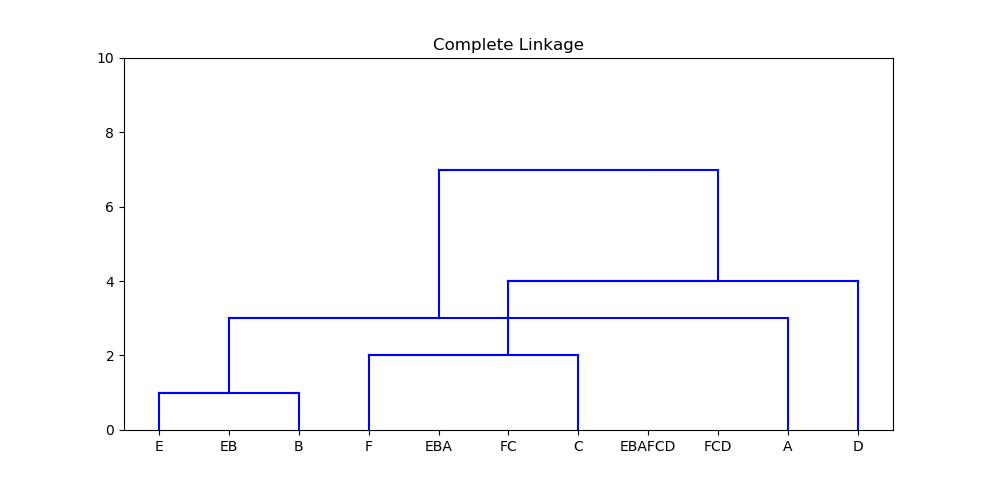

In [21]:
#main('newcluster')
main('data2.txt')